# TensorFlow 101 & Word2Vec

## Getting Started with TensorFlow
* The benefits of using TensorFlow include:
    * Python API
    * Portability: can be used on multiple CPUs or GPUs as well as on mobile devices
    * Flexibility: can run on different devices e.g. Raspberry Pi, Android, iOS, Windows, Linux
    * Visualization: visualize the training process via TensorBoard
    * Checkpoints: manage trained models
    * Auto-differentiation
    * Large community

## Graph and Sessions
* In TensorFlow, the definition of computations is separated from their execution. 
* First, we specify the operations by building a data flow graph in Python. Next, TensorFlow runs the graph with a Session using optimized C++ code. Let's import tensorflow first.

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "3" # choose which GPU you want to use

from tempfile import gettempdir
import urllib
import zipfile
import numpy as np
import random
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)

1.9.0


### Graph
* A computational graph is a series of TensorFlow operations arranged into a graph. The graph is composed of two types of objects.
    * tf.Operation: The nodes of the graph. Operations describe calculations that consume and produce tensors.
    * tf.Tensor: The edges in the graph. These represent the values that will flow through the graph. Most TensorFlow functions return tf.Tensors.
        * Notes: tf.Tensors do not have values, they are just handles to elements in the computation graph.

### Session
* To evaluate tensors, instantiate a tf.Session object, informally known as a session. 
* A session encapsulates the state of the TensorFlow runtime, and runs TensorFlow operations.

In [2]:
# build a naive graph
a_tensor = tf.constant(3., name="const3")
b_tensor = tf.constant(4., name="const4")
out_tensor = tf.add(a_tensor, b_tensor)
print(a_tensor, b_tensor, out_tensor, sep="\n")

Tensor("const3:0", shape=(), dtype=float32)
Tensor("const4:0", shape=(), dtype=float32)
Tensor("Add:0", shape=(), dtype=float32)


* Notice that printing the tensors does not output the values 3.0, 4.0, and 7.0 as you might expect. 
* The above statements only build the computation graph. These tf.Tensor objects just represent the results of the operations that will be run.
<img src='https://nthu-datalab.github.io/ml/labs/10_TensorFlow101_Word2Vec/assets/tensor_op.png' width='200'>
* We need a tf.Session to run it.

In [3]:
sess = tf.Session() # create a session
a, b, c = sess.run([a_tensor, b_tensor, out_tensor])
print("a = {} \nb = {} \nc = {}".format(a, b, c))

a = 3.0 
b = 4.0 
c = 7.0


### Tensor
* A tensor is a generalization of vectors and matrices to potentially higher dimensions.
* When writing a TensorFlow program, the main object you manipulate and pass around is the tf.Tensor. 
* A tf.Tensor object represents a partially defined computation that will eventually produce a value. 
* TensorFlow programs work by first building a graph of tf.Tensor objects, detailing how each tensor is computed based on the other available tensors and then by running parts of this graph to achieve the desired results.
* A tf.Tensor has the following properties:
    * a data type (tf.float32, tf.int32, or tf.string, for example)
    * a shape
* The rank of a tensor refers to the number of dimensions it has.
* The shape of a tensor speficies the array's length along each dimension.
    * 3. a rank 0 tensor; a scalar with shape [],
    * [1., 2., 3.] a rank 1 tensor; a vector with shape [3]
    * [[1., 2., 3.], [4., 5., 6.]] a rank 2 tensor; a matrix with shape [2, 3]
    * [[[1., 2., 3.]], [[7., 8., 9.]]] a rank 3 tensor with shape [2, 1, 3]
* Some types of tensors are special. 
* The main ones are:
    * tf.constant
    * tf.Variable
    * tf.placeholder

### tf.constant
* We can create constants by passing lists or constants into the tf.constant function.
    * tf.constant(value, dtype=None, shape=None, name='Const', verify_shape=False)

In [4]:
# constant of 1d tensor (vector)
a = tf.constant([2, 2], dtype=tf.int32, name="vector")
# constant of 2x2 tensor (matrix)
b = tf.constant([[0, 1], [2, 3]], name="matrix")
print(a, b, sep="\n")

Tensor("vector:0", shape=(2,), dtype=int32)
Tensor("matrix:0", shape=(2, 2), dtype=int32)


* We can also create tensors of a specific value.

In [5]:
# a matrix with filled zeros
c = tf.zeros([2, 3], tf.int32, name="zeros_matrix") # [[0, 0, 0], [0, 0, 0]]
# a matrix with filled ones
d = tf.ones([2, 3], tf.int32, name="ones_matrix") #  [[1, 1, 1], [1, 1, 1]]

# create a tensor filled zeros/ones, with shape and type as input_tensor
input_tensor = tf.constant([[1,1], [2,2], [3,3]], dtype=tf.float32)
e = tf.zeros_like(input_tensor, name="zeros_like_matrix")  #  [[0, 0], [0, 0], [0, 0]]
f = tf.ones_like(input_tensor, name="ones_like_matrix") # [[1, 1], [1, 1], [1, 1]]

print(c, d, e, f, sep="\n")

Tensor("zeros_matrix:0", shape=(2, 3), dtype=int32)
Tensor("ones_matrix:0", shape=(2, 3), dtype=int32)
Tensor("zeros_like_matrix:0", shape=(3, 2), dtype=float32)
Tensor("ones_like_matrix:0", shape=(3, 2), dtype=float32)


### tf.Variables
* Unlike a constant, a variable can be assigned to, so its value can be changed. Also, a constant's value is stored on the graph, whereas a variable's value is stored seperately. 
* To declare a variable, we create a instance of tf.get_variable.

In [6]:
# create a variable of vector
vec_var = tf.get_variable(name="vector", shape=[3],
                          initializer=tf.ones_initializer)
# create a variable of matrix
mat_var = tf.get_variable(name="matrix", shape=[5, 3],
                          initializer=tf.random_normal_initializer)

print(vec_var, mat_var, sep="\n")

<tf.Variable 'vector_1:0' shape=(3,) dtype=float32_ref>
<tf.Variable 'matrix_1:0' shape=(5, 3) dtype=float32_ref>


* Or we can create variables by calling tf.Variable.

In [7]:
# instance of `tf.Variable`
var = tf.Variable(2, name="scalar")

# we can assign new value to a variable
var_times_two = var.assign(var * 2) # an operation that assigns value var*2 to var
print(var, var_times_two, sep="\n")

<tf.Variable 'scalar:0' shape=() dtype=int32_ref>
Tensor("Assign:0", shape=(), dtype=int32_ref)


In [8]:
# constant value is not changable
# the following code will casue error
c = tf.constant(0.)
c.assign(1.)

AttributeError: 'Tensor' object has no attribute 'assign'

* Since constraint mentiond above, all fixed value should be as type tf.constant, while trainable weights should be as type tf.Variable
* Before you can use a variable, it must be initialized. If you are programming in the low-level TensorFlow API (that is, you are explicitly creating your own graphs and sessions), you must explicitly initialize the variables.
* To initialize all trainable variables in one go, before training starts, call tf.global_variables_initializer(). This function returns a single operation responsible for initializing all variables in the tf.GraphKeys.GLOBAL_VARIABLES collection. Running this operation initializes all variables.

In [9]:
variable_init_op = tf.global_variables_initializer() # an operation
sess.run(variable_init_op) # initialize the variable

### tf.placeholder
* As it stands, this graph is not especially interesting because it always produces a constant result. 
* A graph can be parameterized to accept external inputs, known as placeholders. 
* A placeholder is a promise to provide a value later, like a function argument.
    * tf.placeholder(dtype, shape=None, name=None)

In [10]:
a_placeholder = tf.placeholder(tf.float32, shape=[None, 3], name="a")
print(a_placeholder)

Tensor("a:0", shape=(?, 3), dtype=float32)


* A placeholder should be provided a value when executed by tf.Session.

In [11]:
sess = tf.Session() 
a = sess.run(a_placeholder, feed_dict={a_placeholder: [[1, 2, 3], [4, 5, 6]]})
print(a)

[[1. 2. 3.]
 [4. 5. 6.]]


## Use an example to summarize above

In [12]:
# Build a basic graph that demos the basic tensorflow concepts
with tf.Graph().as_default() as g:
    # a constant tensor with rank = 0
    scalar_tensor = tf.constant(5., name="scalar") 
    
    # a vector tensor with rank = 1, and filled with random values
    vector_tensor = tf.random_normal(shape=[5], name="vector") 
    
    # tensorflow supports broadcast
    broadcast_with_scalar = vector_tensor + scalar_tensor 
    
    # use placeholder to get values in runtime
    x_input = tf.placeholder(tf.float32, shape=[None, 5], name="input")
    feature_dims = x_input.shape[1]
    
    # a matrix variable with rank = 2.
    matrix_variable = tf.get_variable("matrix",
                                      shape=[feature_dims, 2],
                                      initializer=tf.ones_initializer) 
    mul_with_matrix = tf.matmul(x_input, matrix_variable, name="output")
    
    var_init_op = tf.global_variables_initializer()

In [13]:
feed_data = np.random.randint(5, size=[5, 5])

# Under the scope of session, we can run the value of tensor in default graph
with tf.Session(graph=g) as sess:
    sess.run(var_init_op) # must initialize the variables
    
    scalar, vector, broadcast = sess.run([scalar_tensor,
                                          vector_tensor,
                                          broadcast_with_scalar])
    print("[scalar]\n {} \n[vector]\n {} \n[broadcast]\n {}".format(scalar,
                                                                    vector,
                                                                    broadcast))
    
    x, m, out = sess.run([x_input, matrix_variable, mul_with_matrix],
                         feed_dict={x_input: feed_data})
    print("[input]\n {} \n[matrix]\n {} \n[output]\n {}".format(x, m, out))

[scalar]
 5.0 
[vector]
 [ 0.5607612   0.13617027  0.03677087  0.72220516 -1.4275804 ] 
[broadcast]
 [5.5607615 5.1361704 5.036771  5.722205  3.5724196]
[input]
 [[1. 3. 4. 1. 1.]
 [4. 3. 3. 0. 1.]
 [3. 2. 1. 0. 3.]
 [4. 1. 1. 0. 2.]
 [1. 0. 2. 0. 2.]] 
[matrix]
 [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]] 
[output]
 [[10. 10.]
 [11. 11.]
 [ 9.  9.]
 [ 8.  8.]
 [ 5.  5.]]


## Visualizing a Graph with TensorBoard
* The computations you'll use TensorFlow for - like training a massive deep neural network - can be complex and confusing. 
* To make it easier to understand, debug, and optimize TensorFlow programs, TF included a suite of visualization tools called TensorBoard.
* You can use TensorBoard to visualize your TensorFlow graph, plot quantitative metrics about the execution of your graph, and show additional data like images that pass through it.
<img src='https://nthu-datalab.github.io/ml/labs/10_TensorFlow101_Word2Vec/assets/tensorboard.png' width='700'>

### Save the Graph
* Create a writer with tf.summary.FileWriter to write the graph into file.

In [14]:
graph_dir = "graphs/demo"
os.makedirs(graph_dir)
with tf.Graph().as_default() as g:
    const_a = tf.constant(1., shape=[1, 5], name="const_a")
    const_b = tf.add(const_a, 5, name="const_b")
    var_c = tf.get_variable("var_c", shape=[5, 3])
    const_d = tf.matmul(const_b, var_c, name="const_d")
    # create a writer 
    writer = tf.summary.FileWriter(graph_dir, tf.get_default_graph())

### Launch Tensorboard
* To run TensorBoard, use the following command: 
    * tensorboard --logdir=path/to/log-directory
* where logdir points to the directory where the FileWriter serialized its data.
* If this logdir directory contains subdirectories which contain serialized data from separate runs, then TensorBoard will visualize the data from all of those runs. Once TensorBoard is running, navigate your web browser to localhost:6006 to view the TensorBoard.
<img src='https://nthu-datalab.github.io/ml/labs/10_TensorFlow101_Word2Vec/assets/demo-tensorboard.png' width='300'>
* TensorBoard provides more than that. You can check [here](https://www.tensorflow.org/guide/summaries_and_tensorboard) for more information.

# Very Very important!!!!!

### Save and Restore checkpoints
* Training a deep learning model may take a few hours or even a few days. 
* The learned weights should be saved periodically so that you can restore for further applications. In TensorFlow, all trainable variables can be saved in checkpoints - a binary file that map variable names to tensor values.
* In this part, we will guide you how to save and restore the model. TensorFlow provides a superb class tf.train.Saver to do this work. 
* Its constructor adds save and restore ops to the graph for all, or a specified list, of the variables in the graph. The Saver object provides methods to run these ops, specifying paths for the checkpoint files to write to or read from.
* You can check [here](https://www.tensorflow.org/guide/saved_model) for more than that.

### Save variables
* Create a Saver with tf.train.Saver() to manage all variables in the model. 
* The following cell shows how to call the tf.train.Saver.save method to save variables to checkpoint files.

In [15]:
ckpt_dir = "checkpoints/demo"
os.makedirs(ckpt_dir)
with tf.Graph().as_default() as g:
    const_a = tf.constant(2, tf.int32, [5])
    var_b = tf.get_variable("var_b", dtype=tf.int32, shape=[5],
                            initializer=tf.zeros_initializer) # variable
    const_c = var_b + const_a
    var_d = tf.get_variable("var_d", shape=[3],
                            initializer=tf.ones_initializer) # variable
    
    print("[Graph]", const_a, var_b, const_c, var_d, sep="\n")
    print("\n[Trainable variables]", *tf.trainable_variables(), sep="\n")
    
    init_op = tf.global_variables_initializer()
    # Declare a saver object to save checkpoints
    saver = tf.train.Saver() 

with tf.Session(graph=g) as sess:
    # Initialize variables
    sess.run(init_op)
    
    # Do some works with the model
    a, b, c, d = sess.run([const_a, var_b, const_c, var_d])
    print("\n[Value]", a, b, c, d, sep="\n")
    
    # Save the variables to disk
    save_path = saver.save(sess, os.path.join(ckpt_dir, "model.ckpt"))
    print("\n[Model saved in path: {}]".format(save_path))

[Graph]
Tensor("Const:0", shape=(5,), dtype=int32)
<tf.Variable 'var_b:0' shape=(5,) dtype=int32_ref>
Tensor("add:0", shape=(5,), dtype=int32)
<tf.Variable 'var_d:0' shape=(3,) dtype=float32_ref>

[Trainable variables]
<tf.Variable 'var_b:0' shape=(5,) dtype=int32_ref>
<tf.Variable 'var_d:0' shape=(3,) dtype=float32_ref>

[Value]
[2 2 2 2 2]
[0 0 0 0 0]
[2 2 2 2 2]
[1. 1. 1.]

[Model saved in path: checkpoints/demo/model.ckpt]


### Inspect variables in checkpoints
* This is a **useful function to debug**. Sometimes you may notice that you have some conflict between your model and checkpoints. 
* That's why you need this function to insepct what you stored in the checkpoints.

In [16]:
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
# tensor_name: Name of the tensor in the checkpoint file to print. 
# all_tensors: Boolean indicating whether to print all tensors.
# all_tensor_names: Boolean indicating whether to print all tensor names.
print_tensors_in_checkpoint_file(save_path,
                                 tensor_name="",
                                 all_tensors="",
                                 all_tensor_names=False)

var_b (DT_INT32) [5]
var_d (DT_FLOAT) [3]



### Restore variables
* The tf.train.Saver object not only saves variables to checkpoint files, it also restores variables. 
* $\color{red}{\text{Note}}$ that when you restore variables you do not have to initialize them beforehand. 
* For example, the following snippet demonstrates how to call the tf.train.Saver.restore method to restore variables from the checkpoint files:

In [17]:
with tf.Session(graph=g) as sess:
    saver.restore(sess, save_path)
    a, b, c, d = sess.run([const_a, var_b, const_c, var_d])
    print("\n[Value]", a, b, c, d, sep="\n")

INFO:tensorflow:Restoring parameters from checkpoints/demo/model.ckpt

[Value]
[2 2 2 2 2]
[0 0 0 0 0]
[2 2 2 2 2]
[1. 1. 1.]


In [18]:
# more robust
with tf.Session(graph=g) as sess:
    ckpt = tf.train.get_checkpoint_state(ckpt_dir)
    print(ckpt)
    if ckpt and ckpt.model_checkpoint_path:
        saver.restore(sess, ckpt.model_checkpoint_path)
    a, b, c, d = sess.run([const_a, var_b, const_c, var_d])
    print("\n[Value]", a, b, c, d, sep="\n")

model_checkpoint_path: "checkpoints/demo/model.ckpt"
all_model_checkpoint_paths: "checkpoints/demo/model.ckpt"

INFO:tensorflow:Restoring parameters from checkpoints/demo/model.ckpt

[Value]
[2 2 2 2 2]
[0 0 0 0 0]
[2 2 2 2 2]
[1. 1. 1.]


## Importing data
### Dataset and Iterator
* The tf.data API enables you to build complex input pipelines from simple, reusable pieces. 
* For example, the pipeline for an image model might aggregate data from files in a distributed file system, apply random perturbations to each image, and merge randomly selected images into a batch for training. The pipeline for a text model might involve extracting symbols from raw text data, converting them to embedding identifiers with a lookup table, and batching together sequences of different lengths. 
* The tf.data API makes it easy to deal with large amounts of data, different data formats, and complicated transformations.
* The tf.data API introduces two new abstractions to TensorFlow:
    * A tf.data.Dataset represents a sequence of elements, in which each element contains one or more Tensor objects. 
        * For example, in an image pipeline, an element might be a single training example, with a pair of tensors representing the image data and a label. 
        * There are two distinct ways to create a dataset:
            * Creating a source (e.g. Dataset.from_tensor_slices()) constructs a dataset from one or more tf.Tensor objects.
            * Applying a transformation (e.g. Dataset.batch()) constructs a dataset from one or more tf.data.Dataset objects.
    * A tf.data.Iterator provides the main way to extract elements from a dataset. 
        * The operation returned by Iterator.get_next() yields the next element of a Dataset when executed, and typically acts as the interface between input pipeline code and your model. 
        * The simplest iterator is a "one-shot iterator", which is associated with a particular Dataset and iterates through it once. 
        * For more sophisticated uses, the Iterator.initializer operation enables you to reinitialize and parameterize an iterator with different datasets, so that you can, for example, iterate over training and validation data multiple times in the same program.

In [19]:
tf.reset_default_graph()
## Pseudo dataset
dataset_size = 20
# 20 examples, each example has 5 features
data = np.random.rand(dataset_size, 5)
# this dataset has 3 labels
label = np.random.randint(low=0, high=3, size=dataset_size) 

In [20]:
batch_size = 7

## Create a `dataset` by `from_tensor_slices`
training_dataset = tf.data.Dataset.from_tensor_slices((data, label))
print("[Original dataset] \n", training_dataset)
training_dataset = training_dataset.batch(batch_size)
print("\n[Transformed dataset] \n", training_dataset)

## Create a `iterator` to extract elements from `dataset`
training_iterator = training_dataset.make_initializable_iterator()
x_input, y_label = training_iterator.get_next()
print("\n[Iterator] \n", training_iterator)
print("\n[Elements extracted by iterator] \n", x_input, "\n", y_label)

[Original dataset] 
 <TensorSliceDataset shapes: ((5,), ()), types: (tf.float64, tf.int64)>

[Transformed dataset] 
 <BatchDataset shapes: ((?, 5), (?,)), types: (tf.float64, tf.int64)>

[Iterator] 

[Elements extracted by iterator] 
 Tensor("IteratorGetNext:0", shape=(?, 5), dtype=float64) 
 Tensor("IteratorGetNext:1", shape=(?,), dtype=int64)


* After creating tensor of x_input and y_label, we can build a graph for it.
* Here we skip the model building process, we demonstrates how will the tensors display.

In [21]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True # avoids occupying full memory of GPU
with tf.Session(config=config) as sess:
    sess.run(training_iterator.initializer) # initialize the iterator 
    step = 0 # record the steps
    try:
        while(True):
            x_, y_ = sess.run([x_input, y_label])
            step += 1
            print("{} batch - {} examples".format(step, len(y_)))
            print(x_, y_)
    except tf.errors.OutOfRangeError:
        pass

1 batch - 7 examples
[[0.69507032 0.25118953 0.61266071 0.44003168 0.30113935]
 [0.87280118 0.51761585 0.38677478 0.05839929 0.30306418]
 [0.47897569 0.05592283 0.27137109 0.96620529 0.29255599]
 [0.3484134  0.25219133 0.82599493 0.40188843 0.84520525]
 [0.14570427 0.85133326 0.67677334 0.61922411 0.02308789]
 [0.21940755 0.40837291 0.06455535 0.2121623  0.39840965]
 [0.14568174 0.28880465 0.71695792 0.81745312 0.41030093]] [0 1 2 1 0 2 1]
2 batch - 7 examples
[[0.94010847 0.04593886 0.11948305 0.09974837 0.51419986]
 [0.6075151  0.19458069 0.12099634 0.25292659 0.38429445]
 [0.20214036 0.55046687 0.56806782 0.0400243  0.30312837]
 [0.55660472 0.09050287 0.6530809  0.66135675 0.83914861]
 [0.5637909  0.37355936 0.04997498 0.6048784  0.9006687 ]
 [0.47649245 0.58965803 0.49991578 0.55757594 0.97519476]
 [0.40011013 0.22378639 0.21209775 0.97276286 0.70211188]] [1 1 2 1 1 1 0]
3 batch - 6 examples
[[0.00123643 0.40330752 0.72430283 0.43790874 0.65020544]
 [0.50619529 0.35106484 0.1908261

* Above is the basic mechanics for using dataset and iterator to consume data. 
* The tf.data API provides compact methods to consume data and you can check following link for more comprehensive tutorials.
* [Importing Data](https://www.tensorflow.org/guide/datasets)

## Build basic model
* In this part, we will introduce two methods to build a basic model which has one fully connected layer. 
* Here we guide you to use low level and high level method to construct it. 
* Although high level method provides compact utilities in tf.layers, it is better to understand the concepts of deep learning model using low level method in the beginning.

In [22]:
# setting 
feature_dims = 784 # example with 784 features
neurons = 1024 # fully connected layer with 1024 neurons
classes = 10 # 10 classes classification problem

### Low level
* Construct the layers in neural network from scratch.
* Define weights and bias as trainable variables.

In [23]:
def fully_connected_layer(x_inputs, out_dim, name='fc'):
    """ Low level method
        x_inputs: a batch examples [batch_size, feature_dims]
        out_dim: neurons in this layer.
    """ 
    in_dim = x_inputs.shape[-1] # feature_dims
    with tf.variable_scope(name, reuse=tf.AUTO_REUSE):
        weights = tf.get_variable("weights", shape=[in_dim, out_dim])
        bias = tf.get_variable("bias", shape=[out_dim])
        out = tf.matmul(x_inputs, weights) + bias
        return out

In [24]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, feature_dims])
fc = fully_connected_layer(x, neurons, "fc")
out = fully_connected_layer(fc, classes, "logits")
print("[Output tensor]", fc, out, sep="\n")
print("\n[Variables] ", *tf.trainable_variables(), sep="\n")

[Output tensor]
Tensor("fc/add:0", shape=(?, 1024), dtype=float32)
Tensor("logits/add:0", shape=(?, 10), dtype=float32)

[Variables] 
<tf.Variable 'fc/weights:0' shape=(784, 1024) dtype=float32_ref>
<tf.Variable 'fc/bias:0' shape=(1024,) dtype=float32_ref>
<tf.Variable 'logits/weights:0' shape=(1024, 10) dtype=float32_ref>
<tf.Variable 'logits/bias:0' shape=(10,) dtype=float32_ref>


### High level
* Construct the layers in neural network using tf.layers.
* A high level API provided by TensorFlow.
* It contains a lot of useful methods and arguments.

In [25]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, feature_dims])
fc = tf.layers.dense(x, neurons, activation=tf.nn.relu, name="fc")
out = tf.layers.dense(fc, classes, 
                      activation=tf.nn.softmax, name="logits")
print("[Output tensor]", fc, out, sep="\n")
print("\n[Variables] ", *tf.trainable_variables(), sep="\n")

[Output tensor]
Tensor("fc/Relu:0", shape=(?, 1024), dtype=float32)
Tensor("logits/Softmax:0", shape=(?, 10), dtype=float32)

[Variables] 
<tf.Variable 'fc/kernel:0' shape=(784, 1024) dtype=float32_ref>
<tf.Variable 'fc/bias:0' shape=(1024,) dtype=float32_ref>
<tf.Variable 'logits/kernel:0' shape=(1024, 10) dtype=float32_ref>
<tf.Variable 'logits/bias:0' shape=(10,) dtype=float32_ref>


## Deep Learning Model Walkthrough
1. Build a Graph that:
    * Define dataset and iterator
    * Build the model
    * Define the loss
    * Define the optimizer
    * Other tensors or operations you need (optional)
2. Execute a session to:
    * Initialize the variables
    * Run the target tensors and operations

In [26]:
## template
with tf.Graph().as_default() as g:
    """ Define dataset and iterator """
    with tf.name_scope("data"):
        pass
    
    """ Build the model """
    with tf.name_scope("model"):
        pass

    """ Define the loss """
    with tf.name_scope("loss"):
        pass
    
    """ Define the optimizer """
    with tf.name_scope("optimizer"):
        pass
    
    """ Other tensors or operations you need """
    with tf.name_scope("accuracy"):
        pass

with tf.Session(graph=g) as sess:
    """ Initialize the variables """
    """ Run the target tensors and operations """
    pass

# Word2vec
* Word2Vec is a computationally-efficient model that learns to embed words into vectors. The goal is to map words that have similar meanings close to each other.

## Why represent words as vectors?
* When dealing with words, a straightforward way would be treating each word as discrete symbols. 
* For instance, cat as 2 and dog as 1. However, these symbols carry no information about the original word, making it impossible for us to infer the relationship between cats and dogs (both are four-legged animals and both are pets) based on the symbols alone.
* Hence, to successfully learn the relationship between them, we might need a large amount of training data.
* On the other hand, Vector space models (VSMs) which represent words as vectors can help overcome these obstacles. 
* This is based on a key observation that semantically similar words are often used interchangeably in different contexts. 
* For example, the words cat and dog may both appear in a context "___ is my favorate pet." When feeding cat and dog into the NN to predict their nearby words, these two words will be likely to share the same/similar hidden representation in order to predict the same/similar nearby words.

## Skip-Gram and CBOW
* Word2Vec comes in two variants Skip-Gram and CBOW (Continuous Bag-Of-Words). Algorithmically, these models are similar. 

### <a name='BackCBOW'>CBOW</a>
* [CBOW](#CBOW) predicts the target words using its neighborhood(context) whereas Skip-Gram does the inverse, which is to predict context words from the target words. 
* For example, given the sentence the quick brown fox jumped over the lazy dog. Defining the context words as the word to the left and right of the target word, CBOW will be trained on the dataset:
    * ([the, brown], quick), ([quick, fox], brown), ([brown, jumped], fox)...
* CBOW tries to predict the target word quick from the context words in brackets [the, brown], and predict brown from [quick, fox] and so on. 
* CBOW smoothes over a lot of the distributional information (by treating an entire context as one example). For the most part, this turns out to be a useful thing for smaller datasets. 
<img src='https://nthu-datalab.github.io/ml/labs/10_TensorFlow101_Word2Vec/assets/Cbow.png' width='300'>

### <a name='BackSG'>Skip-Gram</a>
* [Skip-Gram](#SG), the dataset becomes
    * (quick, the), (quick, brown), (brown, quick), (brown, fox), ...
* where Skip-Gram predicts the context word the, brown with the target word quick. 
* Skip-Gram treats each context-target pair as a new observation and is shown to be able to capture the semantics better when we have a large dataset.
<img src='https://nthu-datalab.github.io/ml/labs/10_TensorFlow101_Word2Vec/assets/Skip-gram.png' width='300'>

* Note that the tasks described above are only used to train the neural network, we don’t use the neural network for the task we trained it on. What we want is the weights of the hidden layer, the "embedding matrix".
* For the rest of the tutorial, we will focus on the Skip-Gram model.

## <a name='BackNCE'>Noise Constrative Estimation</a>
* More information aboit [NCE](#NCE)
* Before we start implementing a skip-gram model, we want to introduce an important techniques that reduce the computing efforts. It is called noise constrative estimation.
* Let's motivate this idea by a naive method. If we want to create a skip-gram model, we can use the following snippets.

In [ ]:
# Naive idea, this is not runnable.

vocabulary_size = 10000
embedding_size = 128
batch_size = 64

with tf.Graph().as_default() as g:
    center_words = tf.placeholder(tf.int32, [batch_size])
    target_words = tf.placeholder(tf.int32, [batch_size])
    
    encode_matrix = tf.get_variable("encoder",
                                    shape=[vocabulary_size, embedding_size])
    decode_matrix = tf.get_variable("decoder",
                                    shape=[embedding_size, vocabulary_size])
    
    embedding = tf.matmul(center_words, encode_matrix)
    logits = tf.matmul(embedding, decode_matrix)

    output = tf.nn.softmax(logits)

<img src='https://nthu-datalab.github.io/ml/labs/10_TensorFlow101_Word2Vec/assets/softmax-nplm.png' width='300'>
* As we can see, it has a large number of parameters in the network and the softmax layer is a computationally intensive task.

### Is there any solution to solve it?
* NCE comes to rescue the problem of softmax.
* Like most neural networks, a Skip-Gram model is trained using the maximum likelihood(ML) principle:
$$\arg\min_{\Theta}\sum_{i=1}^{N}{-\log\mathrm{P}(\boldsymbol{y}^{(i)}\,|\,\boldsymbol{x}^{(i)},\Theta)}$$
* In a multiclass task where $y=1,\cdots,V$(V being the vocabulary size) we usually assume
$$\Pr(y\,|\,\boldsymbol{x})\sim\mathrm{Categorical}(y\,|\,\boldsymbol{x};\boldsymbol{\rho})=\prod_{i=1}^{V}\rho_{i}^{1(y;\,y=i)}.$$
* It is natural to use $V$ Softmax units in the output layer. That is, the activation $a_i^{(L)}$ of each unit at the last layer(layer $L$) $z_i^{(L)}$ outputs one dimension of the softmax function, a generalization of the logistic sigmoid:
$$a_i^{(L)}=\rho_i=\mathrm{softmax}(\boldsymbol{z}^{(L)})_{i}=\frac{\exp(z_{i}^{(L)})}{\sum_{j=1}^{{\color{red}V}}\exp(z_{j}^{(L)})}.$$
* The objective function then becomes:
$$\arg\min_{\Theta}\sum_{i}-\log\prod_{j}\left(\frac{\exp(z_{j}^{(L)})}{\sum_{k=1}^{{\color{red}V}}\exp(z_{k}^{(L)})}\right)^{1(y^{(i)};y^{(i)}=j)}=\arg\min_{\Theta}\sum_{i}\left[-z_{y^{(i)}}^{(L)}+\log\sum_{k=1}^{{\color{red}V}}\exp(z_{k}^{(L)})\right]$$
* On the other hand, for feature learning in word2vec we do not need a full probabilistic model. 
* The CBOW and skip-gram models are instead trained using a binary classification objective (logistic regression) to discriminate the real target words $w_{t}$ from $k$ imaginary (noise) words $\tilde{w}$, in the same context.
<img src='https://nthu-datalab.github.io/ml/labs/10_TensorFlow101_Word2Vec/assets/softmax-nplm.png' width='300'>
* Since we are sampling from two distributions, the correct word is sampled from the true distribution $P$ according to the context c and noise words are sampled from $Q$, which is a noise distribution, in practice, it is said to be a uniform distribution
* The cost function finally transform to:
$$C(\theta) = - \sum_{i=1}^{V} [log\frac{ exp(\,z_{i}^{(L)}\,) }{ exp(\,z_{i}^{(L)}\,) + kQ(\boldsymbol{w})} + logP(1 - \frac{ exp(\,z_{i}^{(L)}\,) }{ exp(\,z_{i}^{(L)}\,) + kQ(\boldsymbol{w})} ]$$

## Application: Skip gram model with NCE loss
### The Dataset
* The dataset we use is text8, which is the first 100 MB of cleaned text of the English Wikipedia dump on Mar. 3, 2006. While 100MB is not enough to train really good embeddings, we can still see some interesting relations. 
* Splitting the text by blank space, we can find that there are 17,005,207 tokens in total.

### Preparing training data
* To generate batches for training, several functions defined below are used. 
* First, we read the data into the memory and build the vocabulary using a number of most commonly seen words. Meanwhile, we build two dictionaries, a dictionary that translates words to indices and another which does the reverse. 
* Then, for every word in the text selected as the center word, pair them with one of the context words. 
* Finally, a python generator which generates a batch of pairs of center-target pairs.

In [28]:
# Download the data.
DOWNLOAD_URL = 'http://mattmahoney.net/dc/'
DATA_FOLDER = "data"
FILE_NAME = "text8.zip"
EXPECTED_BYTES = 31344016

def make_dir(path):
    """ Create a directory if there isn't one already. """
    try:
        os.mkdir(path)
    except OSError:
        pass
    
def download(file_name, expected_bytes):
    """ Download the dataset text8 if it's not already downloaded """
    local_file_path = os.path.join(DATA_FOLDER, file_name)
    if os.path.exists(local_file_path):
        print("Dataset ready")
        return local_file_path
    file_name, _ = urllib.request.urlretrieve(
      os.path.join(DOWNLOAD_URL, file_name), local_file_path)
    file_stat = os.stat(local_file_path)
    if file_stat.st_size == expected_bytes:
        print('Successfully downloaded the file', file_name)
    else:
        raise Exception(
              'File ' + file_name +
              ' might be corrupted. You should try downloading it with a browser.')
    return local_file_path    
    
make_dir(DATA_FOLDER)
file_path = download(FILE_NAME, EXPECTED_BYTES)

Successfully downloaded the file data/text8.zip


In [29]:
# Read the data into a list of strings.
def read_data(file_path):
    """ Read data into a list of tokens"""
    with zipfile.ZipFile(file_path) as f:
        # tf.compat.as_str() converts the input into the string
        data = tf.compat.as_str(f.read(f.namelist()[0])).split()
    return data

vocabulary = read_data(file_path)
print('Data size', len(vocabulary))

Data size 17005207


* Build the dictionary

In [30]:
import collections
# Build the dictionary and replace rare words with UNK token.
def build_dataset(words, n_words):
    """ Create two dictionaries and count of occuring words
        - word_to_id: map of words to their codes
        - id_to_word: maps codes to words (inverse word_to_id)
        - count: map of words to count of occurrences
    """
    count = [['UNK', -1]]
    count.extend(collections.Counter(words).most_common(n_words - 1))
    word_to_id = dict() # (word, id)
    # record word id
    for word, _ in count:
        word_to_id[word] = len(word_to_id)
    id_to_word = dict(zip(word_to_id.values(), word_to_id.keys())) # (id, word)
    return word_to_id, id_to_word, count

def convert_words_to_id(words, dictionary, count):
    """ Replace each word in the dataset with its index in the dictionary"""
    data_w2id = []
    unk_count = 0
    for word in words:
        index = dictionary.get(word, 0)
        if index == 0:
            unk_count += 1
        data_w2id.append(index)
    count[0][1] = unk_count
    return data_w2id, count

In [31]:
"""Filling 4 global variables:
# data_w2id - list of codes (integers from 0 to vocabulary_size-1).
              This is the original text but words are replaced by their codes
# count - map of words(strings) to count of occurrences
# word_to_id - map of words(strings) to their codes(integers)
# id_to_word - maps codes(integers) to words(strings)
"""

vocabulary_size = 50000
word_to_id, id_to_word, count = build_dataset(vocabulary, vocabulary_size)
data_w2id, count = convert_words_to_id(vocabulary, word_to_id, count)
del vocabulary  # reduce memory.

In [32]:
print('Most common words (+UNK)', count[:5])
print('Sample data: {}'.format(data_w2id[:10]))
print([id_to_word[i] for i in data_w2id[:10]])

Most common words (+UNK) [['UNK', 418391], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764)]
Sample data: [5234, 3084, 12, 6, 195, 2, 3134, 46, 59, 156]
['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against']


In [33]:
# utility function
def generate_sample(center_words, context_window_size):
    """ Form training pairs according to the skip-gram model."""
    for idx, center in enumerate(center_words):
        context = random.randint(1, context_window_size)
        # get a random target before the center word
        for target in center_words[max(0, idx - context) : idx]:
            yield center, target
        # get a random target after the center word
        for target in center_words[idx + 1 : idx + context + 1]:
            yield center, target

def batch_generator(data, skip_window, batch_size):
    """ Group a numeric stream into batches and yield them as Numpy arrays."""
    single_gen = generate_sample(data, skip_window)
    while True:
        center_batch = np.zeros(batch_size, dtype=np.int32)
        target_batch = np.zeros([batch_size, 1], dtype=np.int32)
        for idx in range(batch_size):
            center_batch[idx], target_batch[idx] = next(single_gen)
        yield center_batch, target_batch

## Skip-gram word2vec model

In [34]:
## some training settings
training_steps = 1000
skip_step = 100
graph_dir = "graphs/word2vec_simple"
ckpt_dir = "checkpoints/word2vec_simple"

## some hyperparameters
batch_size = 128
embed_size = 128
num_sampled = 64
learning_rates = 1.0

## geneartor for `tf.data.Dataset`
def gen():
    """ Return a python generator that generates batches. """
    yield from batch_generator(data_w2id, 2, batch_size)

## model
def word2vec(dataset):
    
    """ 1. Build the graph""" 
    with tf.name_scope("data"):
        # one_shot_iterator doesn't need to be initialized
        iterator = dataset.make_one_shot_iterator() 
        # get the input and output
        center_words, target_words = iterator.get_next() 
    
    with tf.name_scope('embed'):
        embedding_matrix = tf.get_variable("embedding_matrix",
                                           shape=[vocabulary_size, embed_size])
        embedding = tf.nn.embedding_lookup(embedding_matrix,
                                           center_words, name='embedding')
        
    with tf.name_scope('loss'):
        initializer = tf.truncated_normal_initializer(stddev=1.0 / (embed_size ** 0.5))
        nce_weight = tf.get_variable('nce_weight',
                                     shape=[vocabulary_size, embed_size],
                                     initializer=initializer)
        nce_bias = tf.get_variable('nce_bias', shape=[vocabulary_size],
                                   initializer=tf.zeros_initializer)

        # define loss function to be NCE loss function
        loss = tf.reduce_mean(tf.nn.nce_loss(weights=nce_weight, 
                                            biases=nce_bias, 
                                            labels=target_words, 
                                            inputs=embedding, 
                                            num_sampled=num_sampled, 
                                            num_classes=vocabulary_size), name='loss')
    with tf.name_scope('optimizer'):
        optimizer = tf.train.GradientDescentOptimizer(learning_rates).minimize(loss)
    
    ## store checkpoints
    saver = tf.train.Saver()
    
    """ 2. Execute a session """
    config = tf.ConfigProto() 
    config.gpu_options.allow_growth = True  # avoids occupying full memory of GPU
    with tf.Session(config=config) as sess:
        sess.run(tf.global_variables_initializer())
        ckpt = tf.train.get_checkpoint_state(ckpt_dir)

        # if that checkpoint exists, restore from checkpoint
        if ckpt and ckpt.model_checkpoint_path:
            saver.restore(sess, ckpt.model_checkpoint_path)
        # we use this to calculate late average loss in the last SKIP_STEP steps
        total_loss = 0.0 
        writer = tf.summary.FileWriter(graph_dir, sess.graph)

        for index in range(1, training_steps+1):
            try:
                loss_batch, _ = sess.run([loss, optimizer])
                total_loss += loss_batch
                if index % skip_step == 0:
                    print('Average loss at step {}: {:5.1f}'.format(
                        index, total_loss / skip_step))
                    total_loss = 0.0
                    saver.save(sess,
                               os.path.join(ckpt_dir, "model"),
                               index)
            except tf.errors.OutOfRangeError:
                pass
        writer.close()

In [35]:
tf.reset_default_graph()

dataset = tf.data.Dataset.from_generator(gen, (tf.int32, tf.int32),
                                         (tf.TensorShape([batch_size]),
                                          tf.TensorShape([batch_size, 1])))
word2vec(dataset)

Average loss at step 100: 232.4
Average loss at step 200: 187.3
Average loss at step 300: 166.2
Average loss at step 400: 152.9
Average loss at step 500: 145.5
Average loss at step 600: 131.5
Average loss at step 700: 118.0
Average loss at step 800: 115.4
Average loss at step 900: 108.5
Average loss at step 1000: 104.2


# Assignment
## 1. Learning the XOR
### Problem Definition
* Build a model to challenge this task.
* Input: binary data of shape=[2]
* Output: xor result of this input, shape=[1]
### Requirements
* Show the code of graph and session you build.
* Use low level API method (define the weights and bias from scratch like above)
* Show the accuracy of these 4 examples (it should be 100%)
* Show the values of weights and bias you used.
### Notes
* The model architecture are not constrainted.
* It is an easy nonlinear function that neural network can fit rapidly.

<img src='https://nthu-datalab.github.io/ml/labs/10_TensorFlow101_Word2Vec/assets/xor.png' width='200'>

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
# xor task
graph_dir = "graphxor"

xor_data = np.array([[1, 0],
                    [0, 1],
                    [1, 1],
                    [0, 0]])
xor_label = np.array([[1], [1], [0], [0]])

In [42]:
with tf.Graph().as_default() as g:
    x_input = tf.placeholder(tf.float32, [None, 2])
    y_label = tf.placeholder(tf.float32, [None, 1])
  
    """add code"""
    W1 = tf.Variable(tf.random_uniform([2, 3], -1.0, 1.0))
    b1 = tf.Variable(tf.zeros([3]))
    O = tf.nn.sigmoid(tf.matmul(x_input, W1) + b1)

    W2 = tf.Variable(tf.random_uniform([3, 1], -1.0, 1.0))
    b2 = tf.Variable(tf.zeros([1]))
    y = tf.nn.sigmoid(tf.matmul(O, W2) + b2)
    
    cost = tf.reduce_sum(tf.square(y_label - y), reduction_indices=[0])
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
    
    correcct_prediction = abs(y_label - y) < 0.5
    cast = tf.cast(correcct_prediction, "float")
    accuracy = tf.reduce_mean(cast)
    
    writer = tf.summary.FileWriter(graph_dir, tf.get_default_graph())
    """add code"""
    # start building your model and meet the requirements
    # from here
    
with tf.Session(graph=g) as sess:
    # start run the seesion and meet the requrements
    # from here 
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    Ecoches = 5000
    weigh1, weigh2, bias1, bias2 = sess.run([W1,
                                          W2,
                                          b1, b2])
    print("W1:\n {} \nW2:\n {} \n:b1\n {} \nb2:\n {}".format(weigh1, weigh2, bias1, bias2))
    for i in range(Ecoches):
        sess.run(train_step, feed_dict={x_input : xor_data, y_label :xor_label})

W1:
 [[ 0.9515214   0.7999611   0.09289098]
 [-0.9688332   0.58291626  0.13160276]] 
W2:
 [[-0.9601724 ]
 [-0.13457823]
 [-0.06717491]] 
:b1
 [0. 0. 0.] 
b2:
 [0.]


In [43]:
yy, accuracy = sess.run([y, accuracy], feed_dict={x_input: xor_data, y_label: xor_label})
print("Accuracy: ", accuracy)

Accuracy:  1.0


## 2. MNIST - Digits classification
### Problem Definition
* Build a fully connected network to challenge this task.
* Input: an image of shape=[784]
* Output: a digit of this image, shape=[10]
### Requirements
* Show the code of graph and session you build.
* Use tf.data.Dataset and tf.data.Iterator to extract data.
* Use low level API method to build the model (define the weights and bias from scratch like above).
* The accuracy on mnist.test should be at least 95%.
### Notes
* the hyperparameters are not constrainted (e.g. num_neurons_in_one_layer, how_many_layers, learning_rates, training_epochs, * batch_size)
* the optimizer are not constrainted.
* mnist.train is all you can use to train the model. mnist.validation are just used to be validated.

<img src='https://nthu-datalab.github.io/ml/labs/10_TensorFlow101_Word2Vec/assets/fc.png' width='500'>

In [38]:
from tensorflow.examples.tutorials.mnist import input_data
# load mnist data
mnist = input_data.read_data_sets("data/mnist", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [39]:
print("training data size: {}".format(mnist.train.num_examples))
print("validation data size: {}".format(mnist.validation.num_examples))
print("testing data size: {}".format(mnist.test.num_examples))

print("Shape of image: {}".format(mnist.train.images[0].shape))
print("Shape of label: {}".format(mnist.train.labels[0].shape))

training data size: 55000
validation data size: 5000
testing data size: 10000
Shape of image: (784,)
Shape of label: (10,)


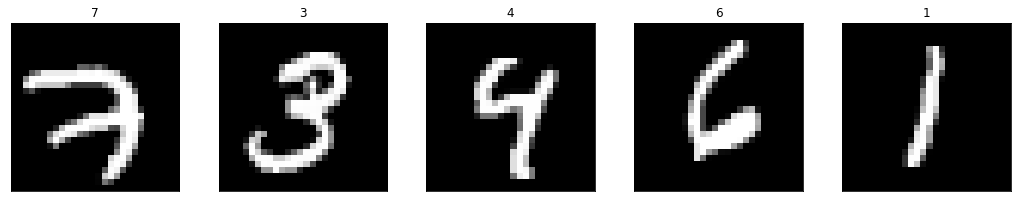

In [40]:
n = 5
plt.figure(figsize=(18,18))
for i in range(5):
    plt.subplot(n, n, i+1)
    plt.imshow(mnist.train.images[i].reshape(28,28), cmap='gray')
    plt.title(np.argmax(mnist.train.labels[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [44]:
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [45]:
batch_size = 7

with tf.Graph().as_default() as g:
    xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
    ys = tf.placeholder(tf.float32, [None, 10])
    keep_prob = tf.placeholder(tf.float32)

    x_image = tf.reshape(xs, [-1, 28, 28, 1])

    W_conv1 = weight_variable([5,5, 1,32])
    b_conv1 = bias_variable([32])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

    W_conv2 = weight_variable([5,5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

    W_fc1 = weight_variable([7*7*64, 1024])
    b_fc1 = bias_variable([1024])

    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])
    prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

    cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),reduction_indices=[1]))# loss
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    
    writer = tf.summary.FileWriter(graph_dir, tf.get_default_graph())


with tf.Session(graph=g) as sess:
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    training_dataset = tf.data.Dataset.from_tensor_slices((mnist.train.images, mnist.train.labels))
    training_dataset = training_dataset.batch(batch_size)
    training_iterator = training_dataset.make_initializable_iterator()
    sess.run(training_iterator.initializer)
    
    for i in range(3000):
        x_input, y_label = training_iterator.get_next()
        x_, y_ = sess.run([x_input, y_label])
        sess.run(train_step, feed_dict={xs: x_, ys: y_, keep_prob: 0.5})
        if i % 1000 == 0:
            print(compute_accuracy(mnist.test.images, mnist.test.labels))
    print(compute_accuracy(mnist.test.images, mnist.test.labels))

0.0926


/home/epl002/DL/env-name/lib/python3.5/site-packages/tensorflow/python/data/ops/iterator_ops.py:359: UserWarning: An unusually high number of `Iterator.get_next()` calls was detected. This often indicates that `Iterator.get_next()` is being called inside a training loop, which will cause gradual slowdown and eventual resource exhaustion. If this is the case, restructure your code to call `next_element = iterator.get_next()` once outside the loop, and use `next_element` as the input to some computation that is invoked inside the loop.
  warnings.warn(GET_NEXT_CALL_WARNING_MESSAGE)


0.9237
0.9483
0.9636


# <a name='SG'>Skip-gram</a>
* 在自然語言中，許多單字的表達是由他們的tf-idf分數決定的
* 這些分數告訴我們一個單字在一個文本中的相對重要性，但他們並沒有告訴我們單詞的語義
* Word2vec是一類的神經網路模型，再給定無標籤的語料庫情況下，為語料庫中的單詞產生一個能表達語意的向量
* input:
    * 一個單詞$w_{i}$
* output:
    * 上下文的窗口大小為$C$
    * $w_{i}$的上下文${w_{O,1},...,w_{O,C}}$
* Example:
    * 句子: I drive my car to the store.
    * 如果input是"car"
    * output:{“I”, “drive”, “my”, “to”, “the”, “store”}
<img src='https://nthu-datalab.github.io/ml/labs/10_TensorFlow101_Word2Vec/assets/Skip-gram.png' width='300'>
-------------------
* [Reference](https://blog.csdn.net/u010665216/article/details/78721354)
* [Go to Skip-gram](#BackSG)

# <a name='CBOW'>CBOW</a>
* Continuous Bag of Words
* CBOW與skip-gram相反
* input為$w_{0}, w_{1}, ..., w_{j}$
* output為$w_{j}$
-------------------
* [Reference](https://blog.csdn.net/u010665216/article/details/78721354)
* [Go to CBOW](#BackCBOW)

# <a name='NCE'>Noise Contrastive estimation</a>
* 噪音對比估計（NCE）作為一個比重要性採樣方法（IS）更穩定的採樣方法提出
* NCE 並沒有試圖直接預測一個詞的機率，而是用一個輔助性的損失函數來同時最大化正確詞的機率
* 將預測正確詞的任務簡化到一個二元分類任務，其中模型試圖從噪音樣本中區分正確、真實的數據
<img src='https://i2.kknews.cc/SIG=g9ik31/s68000933op14s7s4s3.jpg' width='300'>
-------------------
* [Reference](https://kknews.cc/zh-tw/news/6xqo2l.html)
* [Go to NCE](#BackNCE)